In [1]:
"""
Assess how well a C3PO-like model trained only on one backbone performs on the other backbone's measurements.
To address how surrounding sequence context affects JTE-607 sensitiviy. 
"""
from __future__ import print_function

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model, Model

from scipy.stats import pearsonr, spearmanr, linregress
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import seaborn as sns


def relevant_metrics(y_pred, y_true):
    #returns the metrics for the dataframe to save for model performance 
    #sklearn r2 is not the linear coefficent 
    #using the scpy linregress function to get that r2
    res = linregress(y_pred, y_true)
    return mean_squared_error(y_true, y_pred), mean_absolute_error(y_true, y_pred), res.rvalue**2, spearmanr(y_true, y_pred)[0]


plt.rcParams["figure.figsize"] = (3.5,2.5)

In [2]:
"""
Load L3 data
"""

L3_output_data_dir = "/JTE-607/Analysis/Revisions_1/models_25nt_logratio_mixedsort_4120_batchnorm-L3only/data_splits/"

L3_data_train_x = pickle.load(open(L3_output_data_dir + "seq_e_train.p", "rb"))
L3_data_train_y = pickle.load(open(L3_output_data_dir + "res_train.p", "rb"))
L3_data_test_x = pickle.load(open(L3_output_data_dir + "seq_e_test.p", "rb"))
L3_data_test_y = pickle.load(open(L3_output_data_dir + "res_test.p", "rb"))

# combine train and test, because in this case all of the L3 data will be test data for the SVLst-only model
L3_data_all_x = np.concatenate((L3_data_train_x, L3_data_test_x), axis=0)
L3_data_all_y = pd.concat([L3_data_train_y, L3_data_test_y])


In [3]:
"""
Load SVLst data
"""

SVLst_output_data_dir = "/JTE-607/Analysis/Revisions_1/models_25nt_logratio_mixedsort_4120_batchnorm-SVLstonly/data_splits/"

SVLst_data_train_x = pickle.load(open(SVLst_output_data_dir + "seq_e_train.p", "rb"))
SVLst_data_train_y = pickle.load(open(SVLst_output_data_dir + "res_train.p", "rb"))
SVLst_data_test_x = pickle.load(open(SVLst_output_data_dir + "seq_e_test.p", "rb"))
SVLst_data_test_y = pickle.load(open(SVLst_output_data_dir + "res_test.p", "rb"))

# combine train and test, because in this case all of the SVLst data will be test data for the L3-only model
SVLst_data_all_x = np.concatenate((SVLst_data_train_x, SVLst_data_test_x), axis=0)
SVLst_data_all_y = pd.concat([SVLst_data_train_y, SVLst_data_test_y])


In [4]:
"""
Load best performing model with only L3 data
"""

all_doses_trial_num = 4
models_dir = "/JTE-607/Analysis/Revisions_1/models_25nt_logratio_mixedsort_4120_batchnorm-L3only/"
C3P0_ratios_model_L3only = load_model("%s/JTE607_CNN_25nt_6epoch_4col_model_%s.hdf5" % (models_dir, all_doses_trial_num))


[2023-06-20 18:25:21.174 ip-172-31-11-19.us-west-1.compute.internal:31442 INFO utils.py:27] RULE_JOB_STOP_SIGNAL_FILENAME: None
[2023-06-20 18:25:21.197 ip-172-31-11-19.us-west-1.compute.internal:31442 INFO profiler_config_parser.py:111] Unable to find config at /opt/ml/input/config/profilerconfig.json. Profiler is disabled.


In [5]:
"""
Load best performing model with only SVLst data
"""

all_doses_trial_num = 6
models_dir = "/JTE-607/Analysis/Revisions_1/models_25nt_logratio_mixedsort_4120_batchnorm-SVLstonly/"
C3P0_ratios_model_SVLstonly = load_model("%s/JTE607_CNN_25nt_6epoch_4col_model_%s.hdf5" % (models_dir, all_doses_trial_num))


In [6]:
figures_dir = "/JTE-607/Analysis/Figures/Revisions_1/individual_backbone_models_data/"

[[ 0.0451516   0.17025201  0.31130674]
 [-0.29899907 -0.44671327 -0.89001894]
 [ 0.10865392  0.09066665  0.03185395]
 ...
 [ 0.01517911  0.24003176  0.50950134]
 [ 0.03081639  0.18875067  0.3557425 ]
 [-0.14348197 -0.3130533  -0.7039542 ]]
      0p5uM_percent  2p5uM_percent  12p5uM_percent
0          0.158997       0.248974        0.382862
1         -0.011128      -0.358545       -0.694788
2          0.262036       0.216982        0.345407
3          0.398708       0.543282        0.725449
4          0.235647       0.421218        0.653545
...             ...            ...             ...
2055       0.328462       0.483059        0.545658
2056       0.125522       0.073770        0.333900
2057       0.150214       0.271301        0.255428
2058       0.197842      -0.585476       -0.479392
2059       0.197842       0.014581        0.064910

[2060 rows x 3 columns]


/home/ec2-user/anaconda3/envs/tensorflow2_p37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


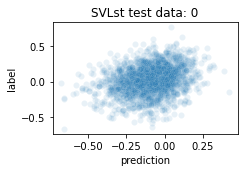

/home/ec2-user/anaconda3/envs/tensorflow2_p37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


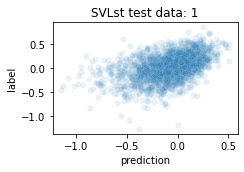

/home/ec2-user/anaconda3/envs/tensorflow2_p37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


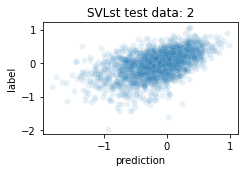

/home/ec2-user/anaconda3/envs/tensorflow2_p37/lib/python3.7/site-packages/ipykernel/__main__.py:43: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


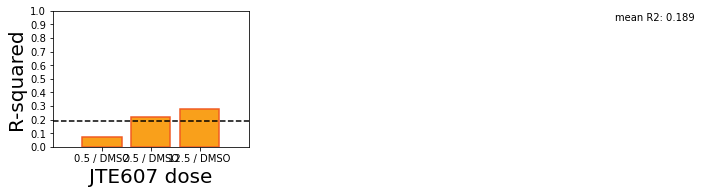

scores [0.071, 0.216, 0.281]


In [7]:
"""
Run predictions from L3 model on test SVLst data
"""

x_preds = C3P0_ratios_model_L3only.predict(SVLst_data_test_x)
print(x_preds)
print(SVLst_data_test_y)

L3only_test_measured_SVLst_df = pd.DataFrame(list(zip(x_preds[:,0], SVLst_data_test_y["0p5uM_percent"], x_preds[:,1], SVLst_data_test_y["2p5uM_percent"], x_preds[:,2], SVLst_data_test_y["12p5uM_percent"])), \
                              columns = ["predicted_SVL_0p5uM_resistance", "measured_SVL_0p5uM_resistance", "predicted_SVL_2p5uM_resistance", "measured_SVL_2p5uM_resistance", "predicted_SVL_12p5uM_resistance", "measured_SVL_12p5uM_resistance"])
L3only_test_measured_SVLst_df.to_csv('/JTE-607/Analysis/Figures/Source_Data/L3only_test_measured_SVLst_df.tsv', sep="\t", index=False)

scores = []
for i in range(3):
    pred = x_preds[:,i]
    obs = SVLst_data_test_y[SVLst_data_test_y.columns[i]]
    slope, intercept, r_value, p_value, std_err = linregress(obs,pred)
    scores.append(round(r_value**2, 3))
    
    sns.scatterplot(pred, obs, alpha = 0.1)
    plt.xlabel('prediction')
    plt.ylabel('label')
    plt.title('SVLst test data: %s' % (i))
    plt.tight_layout()
    plt.savefig(figures_dir+"scatter_L3model_testSVLst_%s.pdf" % (i))
    plt.show()
    relevant_metrics(pred, obs)

mean = round(np.array(scores).sum() / len(scores),3)
f, ax = plt.subplots()
ax.bar(x=["0.5 / DMSO", "2.5 / DMSO", "12.5 / DMSO"],height=scores,align='center',color='#F9A01B',edgecolor='#F15A22', linewidth=1.5)
ax.set_xticks(range(0,3));
ax.set_xlim((-1,3))

ax.set_yticks(np.arange(0,1.01,0.1))
ax.set_yticklabels([round(x,1) for x in np.arange(0,1.01,0.1)])
ax.axhline(mean, linewidth=1.5, ls='dashed', color='k')
ax.text(x=10.5, y=0.93, s='mean R2: ' + str(mean))
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_xlabel('JTE607 dose', size=20)
ax.set_ylabel('R-squared', size=20)
plt.tight_layout()
plt.savefig(figures_dir+"L3model_testSVLst_R2.pdf")
plt.show()

print("scores", scores)

[[ 0.03448602  0.19527039  0.44201887]
 [-0.21181418 -0.09689447 -0.11317383]
 [-0.21285829 -0.47382274 -0.9237107 ]
 ...
 [-0.09437253  0.17589433  0.2703666 ]
 [-0.1151704  -0.12126334 -0.30870172]
 [ 0.03874167  0.07246763  0.1076825 ]]
      0p5uM_percent  2p5uM_percent  12p5uM_percent
0         -0.063896       0.214028        0.408453
1         -0.169079       0.045483        0.017941
2         -0.263721      -0.588781       -1.410902
3         -0.167095      -0.095036       -0.215323
4          0.027381      -0.157408       -0.344722
...             ...            ...             ...
2055      -0.149442      -0.026876       -0.549716
2056       0.037770       0.149747        0.070861
2057       0.246171       0.316069        0.450916
2058       0.246171       0.039082        0.182652
2059       0.216018       0.100957        0.070861

[2060 rows x 3 columns]


/home/ec2-user/anaconda3/envs/tensorflow2_p37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


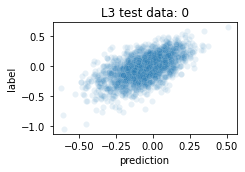

/home/ec2-user/anaconda3/envs/tensorflow2_p37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


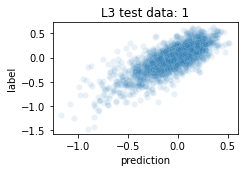

/home/ec2-user/anaconda3/envs/tensorflow2_p37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


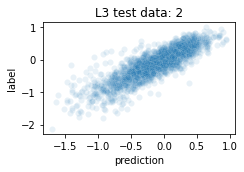

/home/ec2-user/anaconda3/envs/tensorflow2_p37/lib/python3.7/site-packages/ipykernel/__main__.py:43: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


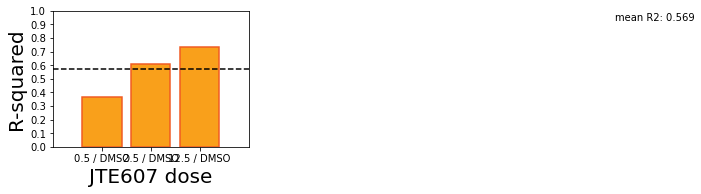

scores [0.366, 0.61, 0.731]


In [8]:
"""
Run predictions from L3 model on test L3 data
"""

x_preds = C3P0_ratios_model_L3only.predict(L3_data_test_x)
print(x_preds)
print(L3_data_test_y)

L3only_test_measured_L3_df = pd.DataFrame(list(zip(x_preds[:,0], L3_data_test_y["0p5uM_percent"], x_preds[:,1], L3_data_test_y["2p5uM_percent"], x_preds[:,2], L3_data_test_y["12p5uM_percent"])), \
                              columns = ["predicted_L3_0p5uM_resistance", "measured_L3_0p5uM_resistance", "predicted_L3_2p5uM_resistance", "measured_L3_2p5uM_resistance", "predicted_L3_12p5uM_resistance", "measured_L3_12p5uM_resistance"])
L3only_test_measured_L3_df.to_csv('/JTE-607/Analysis/Figures/Source_Data/L3only_test_measured_L3_df.tsv', sep="\t", index=False)

scores = []
for i in range(3):
    pred = x_preds[:,i]
    obs = L3_data_test_y[L3_data_test_y.columns[i]]
    slope, intercept, r_value, p_value, std_err = linregress(obs,pred)
    scores.append(round(r_value**2, 3))
    
    sns.scatterplot(pred, obs, alpha = 0.1)
    plt.xlabel('prediction')
    plt.ylabel('label')
    plt.title('L3 test data: %s' % (i))
    plt.tight_layout()
    plt.savefig(figures_dir+"scatter_L3model_testL3_%s.pdf" % (i))
    plt.show()
    relevant_metrics(pred, obs)

mean = round(np.array(scores).sum() / len(scores),3)
f, ax = plt.subplots()
ax.bar(x=["0.5 / DMSO", "2.5 / DMSO", "12.5 / DMSO"],height=scores,align='center',color='#F9A01B',edgecolor='#F15A22', linewidth=1.5)
ax.set_xticks(range(0,3));
ax.set_xlim((-1,3))

ax.set_yticks(np.arange(0,1.01,0.1))
ax.set_yticklabels([round(x,1) for x in np.arange(0,1.01,0.1)])
ax.axhline(mean, linewidth=1.5, ls='dashed', color='k')
ax.text(x=10.5, y=0.93, s='mean R2: ' + str(mean))
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_xlabel('JTE607 dose', size=20)
ax.set_ylabel('R-squared', size=20)
plt.tight_layout()
plt.savefig(figures_dir+"L3model_testL3_R2.pdf")
plt.show()

print("scores", scores)

[[ 0.02713919  0.04977722  0.0570877 ]
 [-0.1137616  -0.18355423 -0.21799916]
 [ 0.04306931 -0.05291519 -0.27369705]
 ...
 [ 0.17961285  0.25232553  0.32342303]
 [-0.07813365 -0.19787121 -0.41596088]
 [-0.13098493 -0.14240879 -0.11308248]]
      0p5uM_percent  2p5uM_percent  12p5uM_percent
0         -0.063896       0.214028        0.408453
1         -0.169079       0.045483        0.017941
2         -0.263721      -0.588781       -1.410902
3         -0.167095      -0.095036       -0.215323
4          0.027381      -0.157408       -0.344722
...             ...            ...             ...
2055      -0.149442      -0.026876       -0.549716
2056       0.037770       0.149747        0.070861
2057       0.246171       0.316069        0.450916
2058       0.246171       0.039082        0.182652
2059       0.216018       0.100957        0.070861

[2060 rows x 3 columns]


/home/ec2-user/anaconda3/envs/tensorflow2_p37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


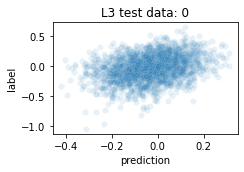

/home/ec2-user/anaconda3/envs/tensorflow2_p37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


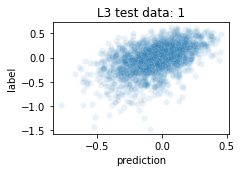

/home/ec2-user/anaconda3/envs/tensorflow2_p37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


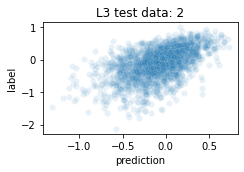

/home/ec2-user/anaconda3/envs/tensorflow2_p37/lib/python3.7/site-packages/ipykernel/__main__.py:43: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


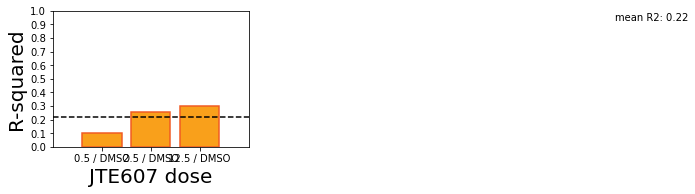

scores [0.104, 0.258, 0.297]


In [9]:
"""
Run predictions from SVLst model on test L3 data
"""

x_preds = C3P0_ratios_model_SVLstonly.predict(L3_data_test_x)
print(x_preds)
print(L3_data_test_y)

SVLonly_test_measured_L3_df = pd.DataFrame(list(zip(x_preds[:,0], L3_data_test_y["0p5uM_percent"], x_preds[:,1], L3_data_test_y["2p5uM_percent"], x_preds[:,2], L3_data_test_y["12p5uM_percent"])), \
                              columns = ["predicted_L3_0p5uM_resistance", "measured_L3_0p5uM_resistance", "predicted_L3_2p5uM_resistance", "measured_L3_2p5uM_resistance", "predicted_L3_12p5uM_resistance", "measured_L3_12p5uM_resistance"])
SVLonly_test_measured_L3_df.to_csv('/JTE-607/Analysis/Figures/Source_Data/SVLonly_test_measured_L3_df.tsv', sep="\t", index=False)

scores = []
for i in range(3):
    pred = x_preds[:,i]
    obs = L3_data_test_y[SVLst_data_test_y.columns[i]]
    slope, intercept, r_value, p_value, std_err = linregress(obs,pred)
    scores.append(round(r_value**2, 3))
    
    sns.scatterplot(pred, obs, alpha = 0.1)
    plt.xlabel('prediction')
    plt.ylabel('label')
    plt.title('L3 test data: %s' % (i))
    plt.tight_layout()
    plt.savefig(figures_dir+"scatter_SVLstmodel_testL3_%s.pdf" % (i))
    plt.show()
    relevant_metrics(pred, obs)

mean = round(np.array(scores).sum() / len(scores),3)
f, ax = plt.subplots()
ax.bar(x=["0.5 / DMSO", "2.5 / DMSO", "12.5 / DMSO"],height=scores,align='center',color='#F9A01B',edgecolor='#F15A22', linewidth=1.5)
ax.set_xticks(range(0,3));
ax.set_xlim((-1,3))

ax.set_yticks(np.arange(0,1.01,0.1))
ax.set_yticklabels([round(x,1) for x in np.arange(0,1.01,0.1)])
ax.axhline(mean, linewidth=1.5, ls='dashed', color='k')
ax.text(x=10.5, y=0.93, s='mean R2: ' + str(mean))
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_xlabel('JTE607 dose', size=20)
ax.set_ylabel('R-squared', size=20)
plt.tight_layout()
plt.savefig(figures_dir+"SVLstmodel_testL3_R2.pdf")
plt.show()

print("scores", scores)

[[ 0.0752433   0.13944933  0.24204388]
 [ 0.02949724 -0.21197939 -0.63972497]
 [ 0.10729504  0.17720085  0.21812102]
 ...
 [ 0.14058566  0.22935897  0.3604882 ]
 [-0.09250106 -0.27894133 -0.6437109 ]
 [ 0.08185753  0.13348228  0.2012501 ]]
      0p5uM_percent  2p5uM_percent  12p5uM_percent
0          0.158997       0.248974        0.382862
1         -0.011128      -0.358545       -0.694788
2          0.262036       0.216982        0.345407
3          0.398708       0.543282        0.725449
4          0.235647       0.421218        0.653545
...             ...            ...             ...
2055       0.328462       0.483059        0.545658
2056       0.125522       0.073770        0.333900
2057       0.150214       0.271301        0.255428
2058       0.197842      -0.585476       -0.479392
2059       0.197842       0.014581        0.064910

[2060 rows x 3 columns]


/home/ec2-user/anaconda3/envs/tensorflow2_p37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


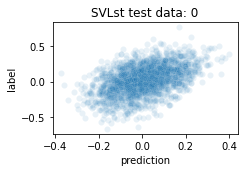

/home/ec2-user/anaconda3/envs/tensorflow2_p37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


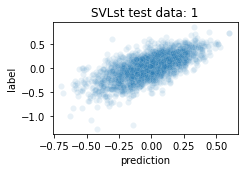

/home/ec2-user/anaconda3/envs/tensorflow2_p37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


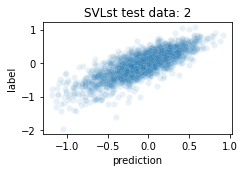

/home/ec2-user/anaconda3/envs/tensorflow2_p37/lib/python3.7/site-packages/ipykernel/__main__.py:43: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


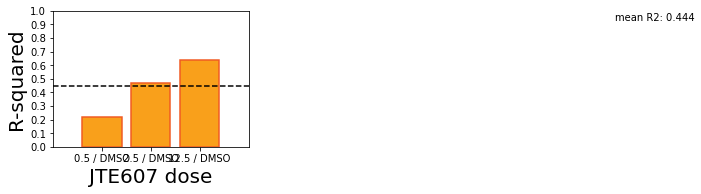

scores [0.221, 0.468, 0.642]


In [10]:
"""
Run predictions from SVLst model on test SVLst data
"""

x_preds = C3P0_ratios_model_SVLstonly.predict(SVLst_data_test_x)
print(x_preds)
print(SVLst_data_test_y)

SVLonly_test_measured_SVL_df = pd.DataFrame(list(zip(x_preds[:,0], SVLst_data_test_y["0p5uM_percent"], x_preds[:,1], SVLst_data_test_y["2p5uM_percent"], x_preds[:,2], SVLst_data_test_y["12p5uM_percent"])), \
                              columns = ["predicted_SVL_0p5uM_resistance", "measured_SVL_0p5uM_resistance", "predicted_SVL_2p5uM_resistance", "measured_SVL_2p5uM_resistance", "predicted_SVL_12p5uM_resistance", "measured_SVL_12p5uM_resistance"])
SVLonly_test_measured_SVL_df.to_csv('/JTE-607/Analysis/Figures/Source_Data/SVLonly_test_measured_SVL_df.tsv', sep="\t", index=False)

scores = []
for i in range(3):
    pred = x_preds[:,i]
    obs = SVLst_data_test_y[SVLst_data_test_y.columns[i]]
    slope, intercept, r_value, p_value, std_err = linregress(obs,pred)
    scores.append(round(r_value**2, 3))
    
    sns.scatterplot(pred, obs, alpha = 0.1)
    plt.xlabel('prediction')
    plt.ylabel('label')
    plt.title('SVLst test data: %s' % (i))
    plt.tight_layout()
    plt.savefig(figures_dir+"scatter_SVLstmodel_testSVLst_%s.pdf" % (i))
    plt.show()
    relevant_metrics(pred, obs)

mean = round(np.array(scores).sum() / len(scores),3)
f, ax = plt.subplots()
ax.bar(x=["0.5 / DMSO", "2.5 / DMSO", "12.5 / DMSO"],height=scores,align='center',color='#F9A01B',edgecolor='#F15A22', linewidth=1.5)
ax.set_xticks(range(0,3));
ax.set_xlim((-1,3))

ax.set_yticks(np.arange(0,1.01,0.1))
ax.set_yticklabels([round(x,1) for x in np.arange(0,1.01,0.1)])
ax.axhline(mean, linewidth=1.5, ls='dashed', color='k')
ax.text(x=10.5, y=0.93, s='mean R2: ' + str(mean))
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_xlabel('JTE607 dose', size=20)
ax.set_ylabel('R-squared', size=20)
plt.tight_layout()
plt.savefig(figures_dir+"SVLstmodel_testSVLst_R2.pdf")
plt.show()

print("scores", scores)